In [23]:
import fitz
import pdfplumber

In [24]:
pdf_path = '../resources/aveiro-bus-11.pdf'
pdf_rot_path = '../resources/aveiro-bus-11.90.pdf'

In [25]:
pdf = fitz.open(pdf_path)
for page in pdf:
    page.set_rotation(90)
pdf.save(pdf_rot_path)
pdf.close()

In [26]:
pdf = pdfplumber.open(pdf_path)
pdf_page = pdf.pages[0]

In [27]:
height_px, width_px = pdf_page.height, pdf_page.width
height_mm, width_mm = 297, 297
height_scale, width_scale = height_px/height_mm, width_px/width_mm
height_scale, width_scale

(2.8346464646464646, 2.8346464646464646)

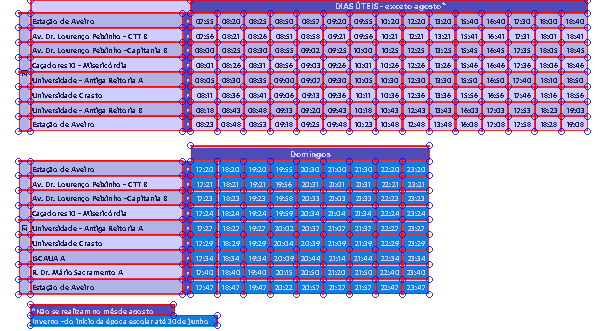

In [28]:
crop_bbox = (
    width_scale * 40,
    height_scale * 50,
    width_scale * (width_mm - 40),
    height_scale * (height_mm - 130),
)
table_settings = {
    "horizontal_strategy": "lines",
    "vertical_strategy": "lines",
    "intersection_x_tolerance": 1_000,
    "intersection_y_tolerance": 10,    
    "snap_tolerance": 5,
}
pdf_tables = pdf_page.crop(crop_bbox)
pdf_tables.to_image().debug_tablefinder(table_settings)

In [29]:
tables = pdf_tables.extract_tables(table_settings)
for table in tables:
    print(table)

[[None, '', None, 'DIAS ÚTEIS - exceto agosto*', None, None, None, None, None, None, None, None, None, None, None, None, None, None], ['', 'Estação de Aveiro', '▼', '07:55', '08:20', '08:25', '08:50', '08:57', '09:20', '09:55', '10:20', '12:20', '13:20', '15:40', '16:40', '17:30', '18:00', '18:40'], ['', 'Av. Dr. Lourenço Peixinho - CTT B', '▼', '07:56', '08:21', '08:26', '08:51', '08:58', '09:21', '09:56', '10:21', '12:21', '13:21', '15:41', '16:41', '17:31', '18:01', '18:41'], ['', 'Av. Dr. Lourenço Peixinho - Capitania B', '▼', '08:00', '08:25', '08:30', '08:55', '09:02', '09:25', '10:00', '10:25', '12:25', '13:25', '15:45', '16:45', '17:35', '18:05', '18:45'], ['1', 'Caçadores 10 - Misericórdia', '▼', '08:01', '08:26', '08:31', '08:56', '09:03', '09:26', '10:01', '10:26', '12:26', '13:26', '15:46', '16:46', '17:36', '18:06', '18:46'], ['Z', 'Universidade - Antiga Reitoria A', '▼', '08:05', '08:30', '08:35', '09:00', '09:07', '09:30', '10:05', '10:30', '12:30', '13:30', '15:50', '16

In [30]:
pdf_rot = pdfplumber.open(pdf_rot_path)
pdf_rot_page = pdf_rot.pages[0]

In [31]:
height_px, width_px = pdf_rot_page.height, pdf_rot_page.width
height_mm, width_mm = 297, 297
height_scale, width_scale = height_px/height_mm, width_px/width_mm
height_scale, width_scale

(2.8346464646464646, 2.8346464646464646)

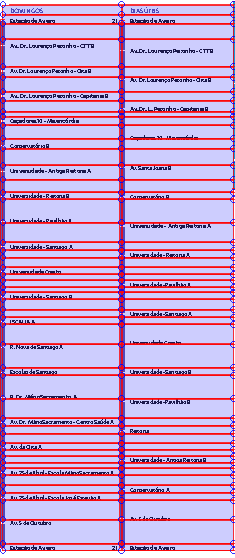

In [32]:
crop_bbox = (
    width_scale * 50,
    height_scale * 50,
    width_scale * (width_mm - 164),
    height_scale * (height_mm - 50),
)
table_settings = {
    "horizontal_strategy": "text",
    "vertical_strategy": "lines",
    "intersection_x_tolerance": 100,
    "intersection_y_tolerance": 1_000,    
    "snap_tolerance": 5,
}
pdf_rot_table = pdf_rot_page.crop(crop_bbox)
pdf_rot_table.to_image().debug_tablefinder(table_settings)

In [33]:
table = pdf_rot_table.extract_table(table_settings)
print(table)

[['DOMINGOS', 'DIAS ÚTEIS'], ['Estação de Aveiro Z1', 'Estação de Aveiro'], ['', ''], ['Av. Dr. Lourenço Peixinho - CTT B', 'Av. Dr. Lourenço Peixinho - CTT B'], ['Av. Dr. Lourenço Peixinho - Oita B', ''], ['', 'Av. Dr. Lourenço Peixinho - Oita B'], ['Av. Dr. Lourenço Peixinho - Capitania B', ''], ['', 'Av. Dr. L. Peixinho - Capitania B'], ['', ''], ['Caçadores 10 - Misericórdia', ''], ['', 'Caçadores 10 - Misericórdia'], ['Conservatório B', ''], ['', ''], ['Universidade - Antiga Reitoria A', 'Av. Santa Joana B'], ['', ''], ['Universidade - Reitoria B', 'Conservatório B'], ['Universidade - Pavilhão A', ''], ['', 'Universidade - Antiga Reitoria A'], ['Universidade - Santiago A', ''], ['', 'Universidade - Reitoria A'], ['', ''], ['Universidade Crasto', ''], ['', ''], ['', 'Universidade - Pavilhão A'], ['', ''], ['Universidade - Santiago B', ''], ['', ''], ['', 'Universidade - Santiago A'], ['ISCAUA A', ''], ['', 'Universidade Crasto'], ['R. Nova de Santiago A', ''], ['Escolas de Santiago